In [1]:
# import the pandas module
import pandas as pd
df_RG = pd.read_csv('data/CTA_BUS_ROUTE_GROUPS.csv') # load the route group into dataframe object
df_RG.dropna(how='any', inplace=True) # Clean the dataframe
df_RG.set_index(['route', 'routename'], inplace=True) # Set the index
df_RG.head() # View the first 5 rows

,,routegroup
route,routename,
1,Bronzeville/Union Station,South Side Downtown
2,Hyde Park Express,South Side Lake Shore Drive
3,King Drive,South Side Downtown
4,Cottage Grove,South Side Downtown
5,South Shore Night Bus,South Side East-West


In [2]:
# Here, I have create a python script/file where there's a method "getdata" that can be called to extract riderships per year.
# But then, I am intersted in no particular year, but all of it, so I am  pass 0 instead
inyear = 0 # Enter year here (from 2001 to 2015)
from cta_data import getdata # import the python script/file and import the method
df_monthly = getdata(inyear) # catch the return dataframe from the method
df_monthly.head() # View the first 5 rows

,,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal,year
route,routename,,,,,,
1,Indiana/Hyde Park,1/1/2001,6982.6,0.0,0.0,153617,2001
2,Hyde Park Express,1/1/2001,1000.0,0.0,0.0,22001,2001
3,King Drive,1/1/2001,21406.5,13210.7,8725.3,567413,2001
4,Cottage Grove,1/1/2001,22432.2,17994.0,10662.2,618796,2001
6,Jackson Park Express,1/1/2001,18443.0,13088.2,7165.6,493926,2001


In [3]:
# Join by route column
df_joined = df_monthly.join(df_RG)

# Perform some data cleaning and reset the index
df_joined.dropna(how='any', inplace=True)
df_joined.reset_index(inplace=True)

# Sort the new dataframe by route group
df_joined.sort_values(['routegroup', 'route', 'routename'], ascending=[True, True, True], inplace=True)
df_joined.head() # View the first 5 rows

,route,routename,Month_Beginning,Avg_Weekday_Rides,Avg_Saturday_Rides,Avg_Sunday-Holiday_Rides,MonthTotal,year,routegroup
1702,120,Ogilvie/Wacker Express,1/1/2001,635.5,0.0,0.0,13982,2001,Downtown
1703,120,Ogilvie/Wacker Express,2/1/2001,624.8,0.0,0.0,12496,2001,Downtown
1704,120,Ogilvie/Wacker Express,3/1/2001,837.4,0.0,0.0,18423,2001,Downtown
1705,120,Ogilvie/Wacker Express,4/1/2001,1134.8,0.0,0.0,23832,2001,Downtown
1706,120,Ogilvie/Wacker Express,5/1/2001,1030.1,0.0,0.0,22663,2001,Downtown


In [4]:
# Define the aggregation for calculations
aggregations = {
    'routename': {'routename_COUNT': 'count'},
    'MonthTotal': {'MonthTotal_TOTAL': 'sum'},
    'Avg_Sunday-Holiday_Rides': {'Avg_Sunday-Holiday_Rides_AVG': 'mean'},
    'Avg_Saturday_Rides': {'Avg_Saturday_Rides_AVG': 'mean'},
    'Avg_Weekday_Rides': {'Avg_Weekday_Rides+AVG' : 'mean'}}

# Group by year and reset the index as it will not be needed
df_year = df_joined.groupby(['year']).agg(aggregations)
df_year.columns = df_year.columns.droplevel(0)
df_year.reset_index(drop = False, inplace = True)
df_year.head() # View the first 5 rows

,year,routename_COUNT,MonthTotal_TOTAL,Avg_Sunday-Holiday_Rides_AVG,Avg_Saturday_Rides_AVG,Avg_Weekday_Rides+AVG
0,2001,1266,277824459,3636.828357,5478.791074,8386.409005
1,2002,1280,278925577,3612.865391,5476.448203,8323.865703
2,2003,1301,267688074,3381.904919,5161.544197,7868.927133
3,2004,1350,270239426,3342.762519,5086.893333,7606.484667
4,2005,1350,277721734,3510.054370,5155.266074,7846.176815


In [5]:
# Group by routegroup and year and reset the index as it will not be needed
df_routegroup_year = df_joined.groupby(['routegroup', 'year']).agg(aggregations)
df_routegroup_year.columns = df_routegroup_year.columns.droplevel(0)
df_routegroup_year.reset_index(drop = False, inplace = True)
df_routegroup_year.tail() # View the last  5 rows

# Now, we have the dataframe where the we can use to 
# visualize the total ridership per year vs the total riderships per routeegroup per year.

,routegroup,year,routename_COUNT,MonthTotal_TOTAL,Avg_Sunday-Holiday_Rides_AVG,Avg_Saturday_Rides_AVG,Avg_Weekday_Rides+AVG
190,West Side East-West,2011,120,40688609,5978.581667,8431.786667,12873.491667
191,West Side East-West,2012,120,41834957,6291.555833,8670.100000,13181.082500
192,West Side East-West,2013,120,39894097,5715.855833,7973.094167,12726.132500
193,West Side East-West,2014,120,37286849,5396.292500,7410.821667,11887.816667
194,West Side East-West,2015,120,37047186,5368.274167,7342.911667,11812.585000


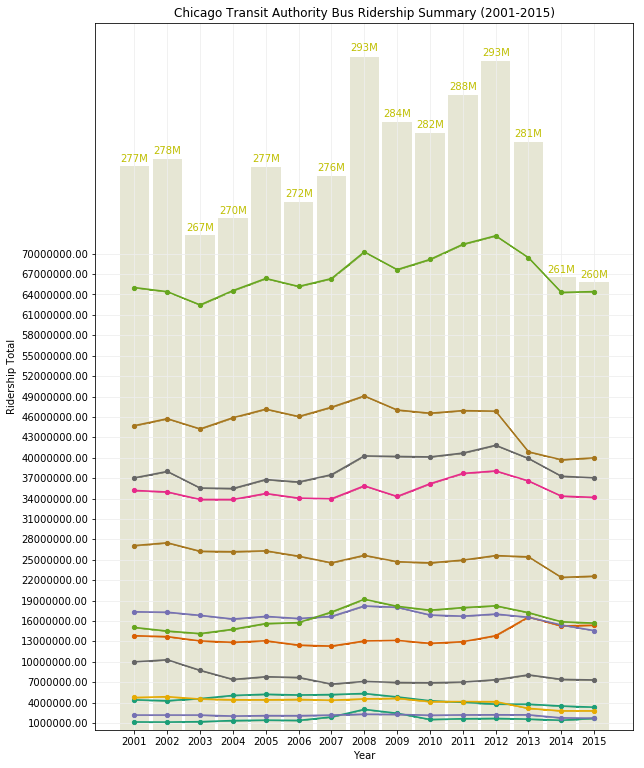

In [7]:
# Jupyter Notebook magic command to show the plots
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np

# using mpld3 library to leverage the function for creating tooltips for the markers in the scatter plot. 
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()


def autolabel(rects, colr):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., h*1.005, '%dM'%int((h+195000000)/1000000),
                ha='center', va='bottom', color = colr)
        

fig, ax = plt.subplots()
fig.set_size_inches(13, 13)
# fig.set_size_inches(14,6)

years = np.arange(len(df_year['year']))

# Plot barplot for ridership totals per year
rects1 = ax.bar(years, df_year['MonthTotal_TOTAL']-195000000, width=0.90, color='#CFCEAB', alpha = 0.5)

# Plot for ridership totals for each routegroup per year, but first set the preferred colormap
cmap = plt.cm.Dark2
routegroups = df_routegroup_year.routegroup.unique() # load the list of routegroup in a list object

for i, routegroup in enumerate(routegroups): # loop through each routegroup
    # plot the monthly total ridership each routegroup per year
    c = cmap(float(i)/(len(routegroups)-1))
    rmyear = df_routegroup_year['MonthTotal_TOTAL'][df_routegroup_year['routegroup'] == routegroup]
    scatter = ax.scatter(years, rmyear.tolist(), color=c, s=18, alpha=1, zorder = 10)
    # connect the ticks with line
    line = ax.plot(years, rmyear.tolist(), color=c, alpha=1, label=routegroup)
    
    # define interactive legend
    ax.fill_between(years, rmyear.tolist(), rmyear.tolist(), color=c)
    handles, labels = ax.get_legend_handles_labels() # return lines and labels
    interactive_legend = plugins.InteractiveLegendPlugin(zip(handles, ax.collections),
                                                         labels,
                                                         alpha_unsel=0.2,
                                                         alpha_over=2, 
                                                         start_visible=False)
    plugins.connect(fig, interactive_legend)
    
    # define point tooltip 
    labels = rmyear.tolist()
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=[str(round(labels[i]/1000000,2)) + 'M' 
                                                               for i in range(0,len(labels),1)])
    plugins.connect(fig, tooltip)    

# Format chart
ax.set_title('Chicago Transit Authority Bus Ridership Summary (2001-2015)')
ax.grid(color='#eeeeee', linestyle='solid', zorder = 0)

ax.set_xticks(np.arange(len(df_year['year'])))
ax.set_xticklabels((df_year['year']))
ax.set_xlabel('Year')

ax.set_yticks(np.arange(1000000, 72500000, 3000000))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.set_ylim(ymin=0)
ax.set_ylabel('Ridership Total')
autolabel(rects1, 'y')
plt.subplots_adjust(right=.7)

# plt.savefig("CTA_Ridership_SUMMARY_bar_line.png", bbox_inches='tight')